# Rede Neural Convolucional com o dataset MNIST

O objetivo desta rede neural é obter uma acurácia superior a 95% com apenas três épocas de treinamento.

#### Importando bibliotecas

In [59]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers
from keras import datasets

#### Divisão entre treino e teste do dataset

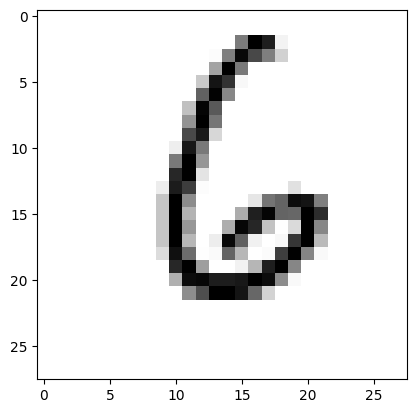

In [61]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

# Conferindo um dos inputs do modelo

plt.imshow(x_train[32],cmap=plt.cm.binary)
plt.show()


#### Definindo os parâmetros da rede neural



In [62]:
# Definindo a forma de entrada no modelo
input_shape = (28, 28, 1)

In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

## Treinando o modelo



Atenção que foram usadas apenas três épocas para treinar o modelo

In [63]:
batch_size = 256
epochs = 3

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=256, epochs=3, validation_split=0.1)

Epoch 1/3
211/211 [==============================] - 3s 7ms/step - loss: 0.1329 - accuracy: 0.9594 - val_loss: 0.0484 - val_accuracy: 0.9867
Epoch 2/3
211/211 [==============================] - 1s 7ms/step - loss: 0.0991 - accuracy: 0.9701 - val_loss: 0.0473 - val_accuracy: 0.9860
Epoch 3/3
211/211 [==============================] - 1s 7ms/step - loss: 0.0849 - accuracy: 0.9734 - val_loss: 0.0416 - val_accuracy: 0.9883


## Verificando o resultado

In [71]:
score = model.evaluate(x_test, y_test, verbose=0)
score_fixed = score[1]*100
print(f"Precisão do modelo com o dataset de teste : {score_fixed:.2f}%")

Precisão do modelo com o dataset de teste : 98.59%
